In [30]:
# revisar los valores nulos
import pandas as pd

df = pd.read_csv('titanic.csv')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# reemplazar los valores faltantes de Age con la media
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

# reemplazar los valores faltantes de Embarked con la moda
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# eliminar la columna Cabin
df.drop('Cabin', axis=1, inplace=True)


In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Survived'>

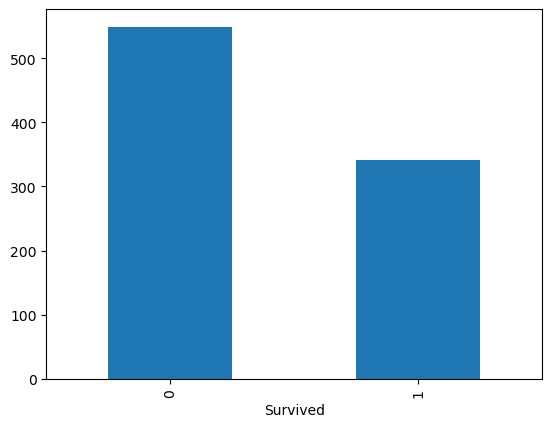

In [33]:
# gráfico de barras con cantidad de sobreviviendes y no sobrevivientes
import matplotlib.pyplot as plt
import seaborn as sns
df['Survived'].value_counts().plot(kind='bar')    

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

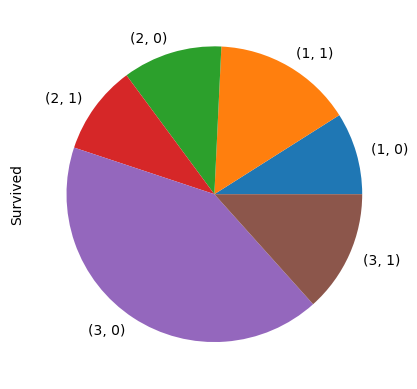

In [40]:
df.groupby(['Pclass', 'Survived'])['Survived'].count().plot(kind='pie')                            

<Axes: xlabel='Pclass', ylabel='Age'>

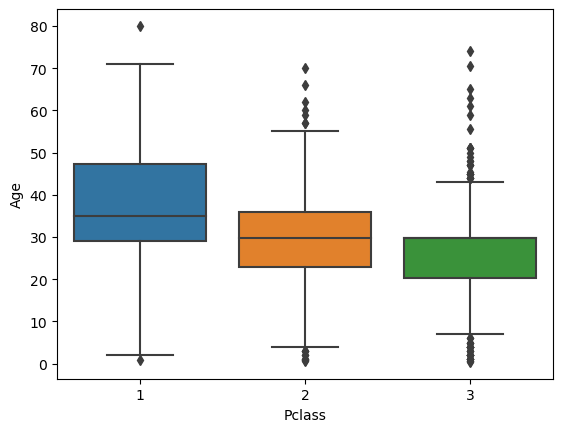

In [35]:
# boxplot de edades por clase
sns.boxplot(x='Pclass', y='Age', data=df)

<Axes: >

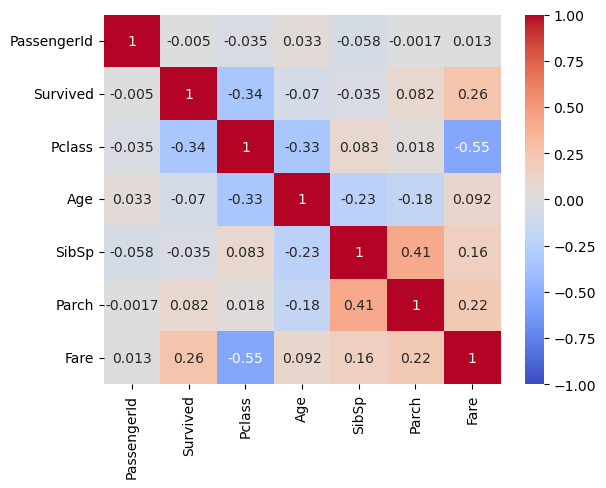

In [39]:
# Quedarse con las columnas numéricas 
numeric_cols = df.select_dtypes(include=['float', 'int'])

# Correlación entre numéricas  
corr = numeric_cols.corr()

# Generar mapa de calor
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            vmax=1,
            vmin=-1)

<Axes: xlabel='Survived', ylabel='Fare'>

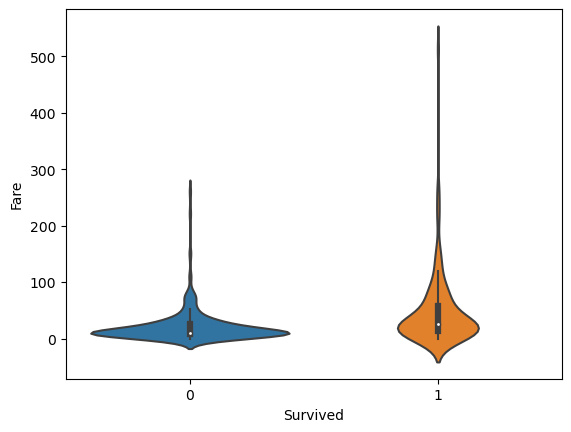

In [38]:
sns.violinplot(x='Survived', y='Fare', data=df)

In [51]:
# calcular medidas de tendencia central y dispersión para todas las variables numéricas
numeric_cols.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
